In [1]:
# Pandas
from config import DB_USER, DB_PASS, DB_ENDPOINT
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt


# SQL Alchemy
from sqlalchemy import create_engine

In [2]:
 # Create Engine
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_ENDPOINT}")
conn = engine.connect()

In [3]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM historical", conn, index_col="index")
data.head()

,crypto,time,open,high,low,close,volume,trade
index,,,,,,,,
0,bitcoin_usdt,1.511914e+09,9896.79000000,11300.03000000,8520.00000000,9687.88000000,13352.53871500,8662.63236200
1,bitcoin_usdt,1.512000e+09,9687.88000000,10900.00000000,8850.80000000,9838.96000000,9389.57432900,5360.66024200
2,bitcoin_usdt,1.512086e+09,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,3269.86858800
3,bitcoin_usdt,1.512173e+09,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,2390.19427500
4,bitcoin_usdt,1.512259e+09,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,2574.24618700


In [4]:
data.isnull().sum()

crypto    0
time      0
open      0
high      0
low       0
close     0
volume    0
trade     0
dtype: int64

In [5]:
# filter for ethereum and reset the index so the index is numbered correctly
ethereum_df = data[data["crypto"] == "ethereum_usdt"]
ethereum_df = ethereum_df.reset_index(drop=True)
ethereum_df.head()

,crypto,time,open,high,low,close,volume,trade
0,ethereum_usdt,1.511914e+09,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,ethereum_usdt,1.512000e+09,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,ethereum_usdt,1.512086e+09,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,ethereum_usdt,1.512173e+09,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,ethereum_usdt,1.512259e+09,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000


In [6]:
# drop the crypto column which is just a name
ethereum_df = ethereum_df.drop("crypto", axis=1)
ethereum_df.head()

,time,open,high,low,close,volume,trade
0,1.511914e+09,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,1.512000e+09,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,1.512086e+09,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,1.512173e+09,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,1.512259e+09,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000


In [7]:
ethereum_df["time"] = pd.to_datetime(ethereum_df['time'], unit="s")
ethereum_df.head()

,time,open,high,low,close,volume,trade
0,2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000


In [8]:
ethereum_df = ethereum_df.set_index("time")
ethereum_df

,open,high,low,close,volume,trade
time,,,,,,
2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...
2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000


In [9]:
ethereum_df.dtypes

open      object
high      object
low       object
close     object
volume    object
trade     object
dtype: object

In [10]:
# convert to numerical
ethereum_df = ethereum_df.astype({"open": float, "high": float, "low":float, "close": float, "volume": float, "trade": float})
ethereum_df.dtypes

open      float64
high      float64
low       float64
close     float64
volume    float64
trade     float64
dtype: object

In [11]:
# Remove the last 30 days as a holdout/unseen test set
X = ethereum_df[:-30]
X

,open,high,low,close,volume,trade
time,,,,,,
2017-11-29,466.17,515.00,385.00,421.70,51313.49571,23825.39377
2017-11-30,421.92,460.00,387.01,427.43,45184.22265,24018.42012
2017-12-01,428.05,465.97,413.74,457.51,33072.21995,19043.24922
2017-12-02,457.53,471.91,445.00,457.63,25796.14000,12336.59141
2017-12-03,457.31,485.90,440.11,460.30,24490.05997,12239.10293
...,...,...,...,...,...,...
2021-10-26,4220.36,4297.00,4090.21,4131.52,414498.15990,205853.06890
2021-10-27,4131.52,4307.00,3909.00,3922.00,704604.25000,342946.25220
2021-10-28,3921.99,4295.00,3890.17,4286.02,626378.50550,331721.67970


In [12]:
# Set data features
X = X.drop("close", axis=1)
X

,open,high,low,volume,trade
time,,,,,
2017-11-29,466.17,515.00,385.00,51313.49571,23825.39377
2017-11-30,421.92,460.00,387.01,45184.22265,24018.42012
2017-12-01,428.05,465.97,413.74,33072.21995,19043.24922
2017-12-02,457.53,471.91,445.00,25796.14000,12336.59141
2017-12-03,457.31,485.90,440.11,24490.05997,12239.10293
...,...,...,...,...,...
2021-10-26,4220.36,4297.00,4090.21,414498.15990,205853.06890
2021-10-27,4131.52,4307.00,3909.00,704604.25000,342946.25220
2021-10-28,3921.99,4295.00,3890.17,626378.50550,331721.67970


In [13]:
# remove 30 days to keep as holdout set
y = ethereum_df[:-30]

In [14]:
# Set data target
y = y[["close"]]
y

,close
time,
2017-11-29,421.70
2017-11-30,427.43
2017-12-01,457.51
2017-12-02,457.63
2017-12-03,460.30
...,...
2021-10-26,4131.52
2021-10-27,3922.00
2021-10-28,4286.02


As our data is time-dependent, we need to use times series split for validation.\
I have set n_splits = 3.
As we have 4 years of data it will split like this:
* 1st split:  TRAIN: Year 1, TEST: Year 2
* 2nd split:  TRAIN: Year 1 to end of Year 2. TEST: Year 3
* 3rd split:  TRAIN: Year 1 to end of Year 3. TEST: Year 4

LR: 0.996226 (0.000816)
Lasso: 0.894463 (0.071172)
Ridge: 0.137056 (0.715464)
RF: 0.398727 (0.720361)
XGBOOST: 0.425675 (0.756686)
NN: 0.991283 (0.003496)
KNN: -7.759898 (7.836185)
SVR: -11.547943 (13.867224)


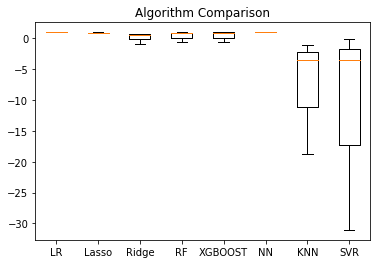

In [15]:
# perform cross validation for different models to see which model will be suitable.
# As this is is time-series data, train test split will not be used, and time series split will be used instead.
import warnings
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score


warnings.simplefilter("ignore")

models = []
models.append(('LR', LinearRegression(normalize=True)))
models.append(('Lasso', Lasso(normalize=True))) 
models.append(('Ridge', Ridge(normalize=True))) 
models.append(('RF', RandomForestRegressor(n_estimators = 200)))
models.append(('XGBOOST', XGBRegressor(n_estimators = 200, verbosity = 0)))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=3)
    cv_results = cross_val_score(model, X, y, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [16]:
# check dataframe date range for splitting into train and test
ethereum_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2017-11-29 to 2021-11-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1462 non-null   float64
 1   high    1462 non-null   float64
 2   low     1462 non-null   float64
 3   close   1462 non-null   float64
 4   volume  1462 non-null   float64
 5   trade   1462 non-null   float64
dtypes: float64(6)
memory usage: 80.0 KB


In [17]:
# now want to reset the train and test data to fit the model and test.

#set train data to be everything except the last month.
train = ethereum_df.loc["2017-11": "2021-09"]

#keep the last 2 months for the test data
test = ethereum_df.loc["2021-10"]

In [18]:
train

,open,high,low,close,volume,trade
time,,,,,,
2017-11-29,466.17,515.00,385.00,421.70,51313.49571,23825.39377
2017-11-30,421.92,460.00,387.01,427.43,45184.22265,24018.42012
2017-12-01,428.05,465.97,413.74,457.51,33072.21995,19043.24922
2017-12-02,457.53,471.91,445.00,457.63,25796.14000,12336.59141
2017-12-03,457.31,485.90,440.11,460.30,24490.05997,12239.10293
...,...,...,...,...,...,...
2021-09-26,2921.84,3115.51,2738.17,3059.37,703594.47800,346152.90530
2021-09-27,3059.36,3164.94,2922.71,2925.59,510130.73190,249913.29030
2021-09-28,2924.76,2970.82,2789.00,2804.91,511325.46430,250476.15270


In [19]:
test

,open,high,low,close,volume,trade
time,,,,,,
2021-10-01,3000.62,3330.00,2969.07,3309.91,648714.61510,336578.17690
2021-10-02,3309.91,3469.00,3257.00,3387.76,422551.18110,215469.09750
2021-10-03,3387.77,3488.00,3342.51,3417.73,360586.89050,183173.92820
2021-10-04,3417.73,3437.19,3270.00,3386.31,485204.64200,234726.45740
2021-10-05,3386.31,3545.00,3363.78,3515.27,393900.88180,198949.77870
2021-10-06,3515.48,3632.11,3342.00,3574.89,618265.54020,309931.14560
2021-10-07,3574.88,3653.98,3470.80,3587.47,486102.35910,243095.03090
2021-10-08,3587.47,3695.00,3532.00,3563.13,403597.14370,199496.51730
2021-10-09,3563.13,3635.00,3538.07,3574.82,361906.75140,181998.68950


In [20]:
# Assign our train and test dataframes to X_train, y_train, X_test, y_test variables
X_train, y_train = train.drop("close", axis=1), train[["close"]]
X_test, y_test =  test.drop("close", axis=1), test[["close"]]

In [21]:
X_train

,open,high,low,volume,trade
time,,,,,
2017-11-29,466.17,515.00,385.00,51313.49571,23825.39377
2017-11-30,421.92,460.00,387.01,45184.22265,24018.42012
2017-12-01,428.05,465.97,413.74,33072.21995,19043.24922
2017-12-02,457.53,471.91,445.00,25796.14000,12336.59141
2017-12-03,457.31,485.90,440.11,24490.05997,12239.10293
...,...,...,...,...,...
2021-09-26,2921.84,3115.51,2738.17,703594.47800,346152.90530
2021-09-27,3059.36,3164.94,2922.71,510130.73190,249913.29030
2021-09-28,2924.76,2970.82,2789.00,511325.46430,250476.15270


In [22]:
y_train

,close
time,
2017-11-29,421.70
2017-11-30,427.43
2017-12-01,457.51
2017-12-02,457.63
2017-12-03,460.30
...,...
2021-09-26,3059.37
2021-09-27,2925.59
2021-09-28,2804.91


In [23]:
# Create model
model = LinearRegression()

In [24]:
# Scale the data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [25]:
# Apply the StandardScaler to the train and test datasets
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Train the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
#print R2 score
model_score = model.score(X_test_scaled, y_test)

print(f"Model R2 Score: {model_score}")

Model R2 Score: 0.955485138376503


In [28]:
# Let's see how well it performs on the test data
pred = model.predict(X_test_scaled)
pred

array([[3266.99727128],
       [3405.43036291],
       [3434.17281665],
       [3324.34093765],
       [3499.81348158],
       [3495.15470965],
       [3563.79750233],
       [3632.13847203],
       [3595.45561754],
       [3475.89853199],
       [3559.34865731],
       [3441.46041601],
       [3535.97095269],
       [3774.82591416],
       [3843.26197099],
       [3901.83674284],
       [3771.25408003],
       [3761.46460405],
       [3847.91370628],
       [4094.00905761],
       [4242.8719771 ],
       [4031.23719722],
       [4112.93882585],
       [4034.73621077],
       [4192.47464945],
       [4187.16823665],
       [4128.69805572],
       [4224.52517125],
       [4414.94429911],
       [4292.63737576],
       [4271.44415999]])

In [29]:
data = pd.DataFrame()
data["actual"] = y_test
data["predicted"] = pred
data["difference(%)"] = (data["predicted"]-data["actual"]) / data["actual"]*100
data

,actual,predicted,difference(%)
time,,,
2021-10-01,3309.91,3266.997271,-1.296492
2021-10-02,3387.76,3405.430363,0.521594
2021-10-03,3417.73,3434.172817,0.481103
2021-10-04,3386.31,3324.340938,-1.829988
2021-10-05,3515.27,3499.813482,-0.439696
2021-10-06,3574.89,3495.154710,-2.230426
2021-10-07,3587.47,3563.797502,-0.659866
2021-10-08,3563.13,3632.138472,1.936737
2021-10-09,3574.82,3595.455618,0.577249


In [30]:
print(data["difference(%)"].mean())

-0.0027137407469865534


<AxesSubplot:xlabel='time'>

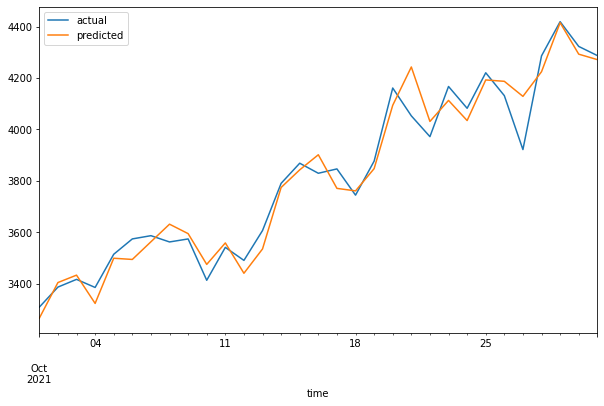

In [31]:
data.plot(y=["actual","predicted"], figsize=(10,6))

In [32]:
data = pd.DataFrame()
data["features"] = X_train.columns.tolist()
data["scores"] = model.coef_[0]
data

,features,scores
0,open,-476.717126
1,high,832.081556
2,low,528.906431
3,volume,-50.840266
4,trade,51.122244


<AxesSubplot:xlabel='features'>

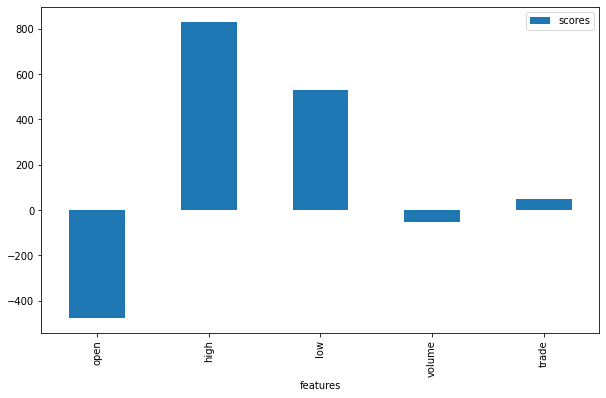

In [33]:
data.plot(kind="bar", x="features", y="scores", figsize=(10,6)) 

All the features seem to be contributing to the close price. 

In [34]:
# now lets try it on the data we reserved
unseen_data = ethereum_df[-30:]
actual_values = unseen_data["close"]
unseen_data = unseen_data.drop("close", axis=1)
unseen_data

,open,high,low,volume,trade
time,,,,,
2021-10-31,4322.68,4399.14,4164.35,412856.28930,207029.19300
2021-11-01,4287.48,4386.58,4146.30,417620.70730,208433.93650
2021-11-02,4319.43,4599.60,4284.43,468184.79301,245450.71120
2021-11-03,4589.68,4665.87,4455.00,448658.35125,221693.79026
2021-11-04,4603.35,4606.65,4420.08,368218.25695,180789.48190
2021-11-05,4532.31,4570.05,4438.80,305651.72440,152155.85650
2021-11-06,4474.24,4530.00,4326.17,322154.09730,162175.62780
2021-11-07,4518.00,4637.98,4502.37,243596.59520,124167.19250
2021-11-08,4612.59,4822.97,4612.00,391102.31806,202324.49531


In [35]:
# we have to scale the data
# Scale the data
unseen_data = X_scaler.transform(unseen_data)

In [36]:
pred = model.predict(unseen_data)

In [37]:
data = pd.DataFrame()
data["actual"] = actual_values
data["predicted"] = pred
data

,actual,predicted
time,,
2021-10-31,4287.21,4271.444160
2021-11-01,4319.43,4267.525514
2021-11-02,4589.89,4532.481753
2021-11-03,4603.35,4551.294109
2021-11-04,4532.32,4468.052209
2021-11-05,4474.24,4485.579958
2021-11-06,4518.00,4410.008117
2021-11-07,4612.59,4595.375017
2021-11-08,4807.98,4781.855634


<AxesSubplot:xlabel='time'>

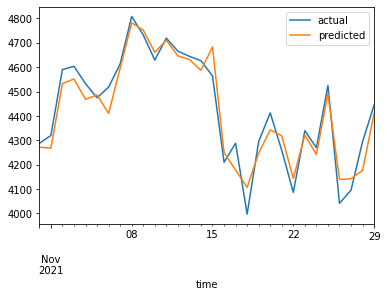

In [38]:
# plot the results
data.plot()

In [39]:
#r2 score on unseen
from sklearn.metrics import r2_score
pred_unseen = model.predict(unseen_data)
r2_score(actual_values, pred_unseen)

0.9200313689849966